In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import re
import pandas as pd
import numpy as np
import pymc
#from scipy.special import gamma as GammaFunction
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import itertools
import os.path
import attila_utils
import mwm
from cellbayesassay import idatas_to_netcdf

In [2]:
treatments_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}

treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}


fpath_CO26990 = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
fpath_CO28152 = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
fpath_CO28154 = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'

fpathl = [fpath_CO26990, fpath_CO28152, fpath_CO28154]
treatmentsl = [treatments_CO26990, treatments_CO28152, treatments_CO28154]
sheet_namel = ['rawdata MWM day 1-4', 'rawdata MWM day 1-4', 'MWM day 1-4']

Z = zip(fpathl, treatmentsl, sheet_namel)

data_CO26990, data_CO28152, data_CO28154 = [mwm.read_data_train(f, t, sheet_name=s) for f, t, s in Z]
data_CO28154.head()

Latency  Distance (cm)  Velocity (cm/s)  \
cohort group sex irn   day                                              
II     A     f   15721 Day 1    52.74     1015.22075        19.086425   
                       Day 2    60.08     1088.82750        18.147125   
                       Day 3    50.68      915.51800        16.998050   
                       Day 4    42.36      683.79500        14.696975   
                 15725 Day 1    54.10      994.20225        18.210400   

                              Thigmotaxis  Floating Cohort Group Sex    IRN  \
cohort group sex irn   day                                                    
II     A     f   15721 Day 1    41.474975  1.507714     II     A   f  15721   
                       Day 2    58.022650  0.499334     II     A   f  15721   
                       Day 3    37.496623  3.224045     II     A   f  15721   
                       Day 4    17.884725  4.353538     II     A   f  15721   
                 15725 Day 1    52.676225  1.860057     II     A   f  15725   

                              Day  Condition Status  
cohort group sex irn   day                           
II     A     f   15721 Day 1  1.0  Saline TG   none  
                       Day 2  2.0  Saline TG  right  
                       Day 3  3.0  Saline TG   none  
                       Day 4  4.0  Saline TG   none  
                 15725 Day 1  1.0  Saline TG   none

In [3]:
plotd_CO26990 = {
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT']),
}

latency-Amiloride-10-TG


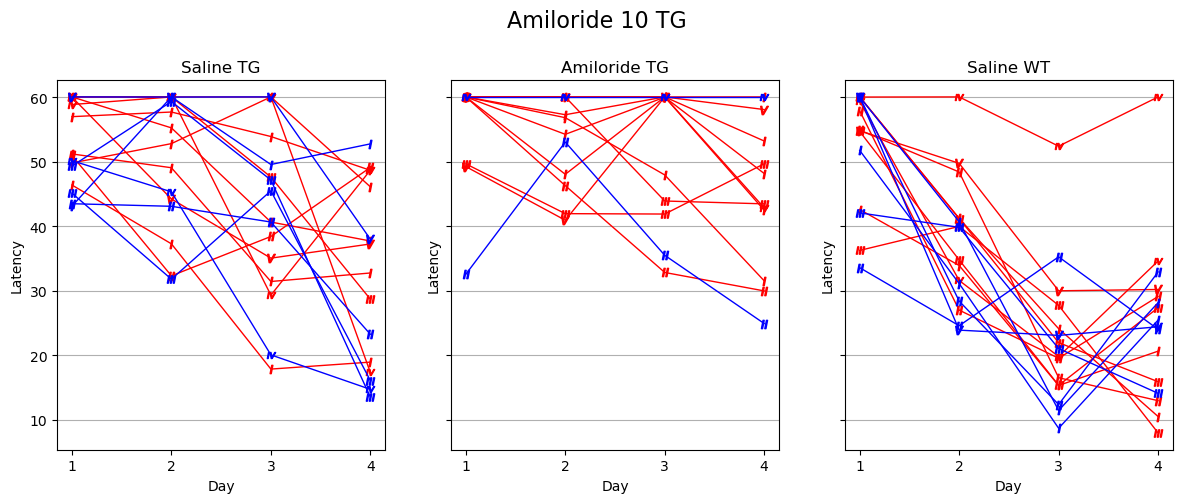

In [4]:
for k, v in plotd_CO26990.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

In [5]:
plotd_CO28152 = {
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT']),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG', 'Saline WT']),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG', 'Saline WT']),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG', 'Saline WT']),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG', 'Saline WT']),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG', 'Saline WT']),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA WT', 'DMSO WT']),
}

latency-Amiloride-12-TG
latency-HCQ-TG
latency-HCQ-nano-TG
latency-R-HCQ-TG
latency-S-HCQ-TG
latency-TUDCA-TG
latency-TUDCA-WT


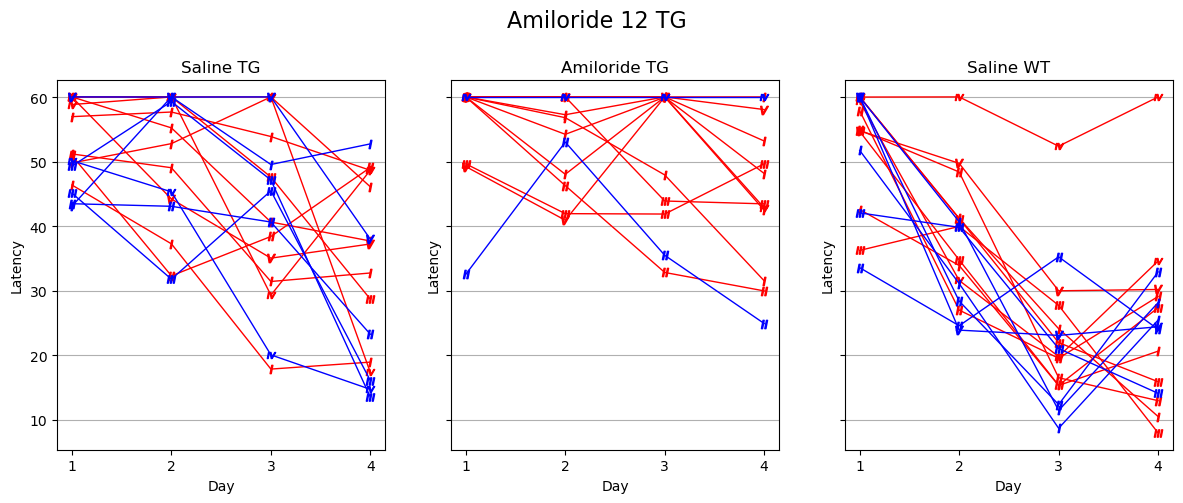

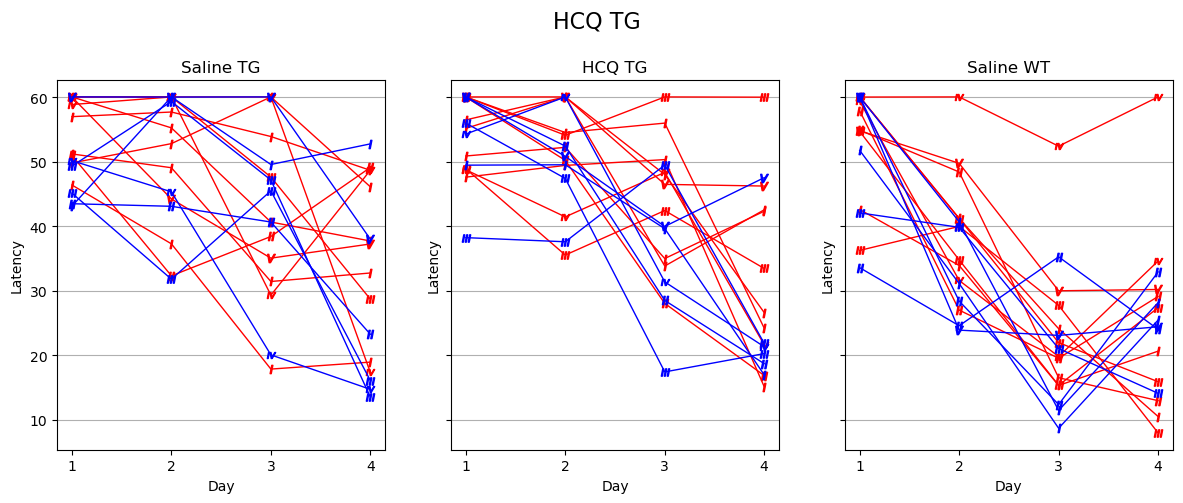

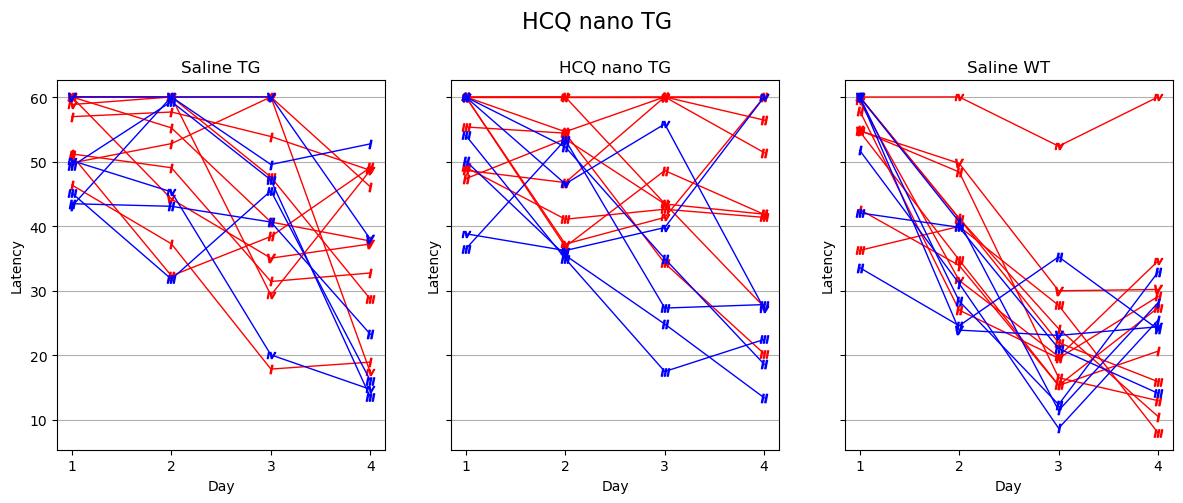

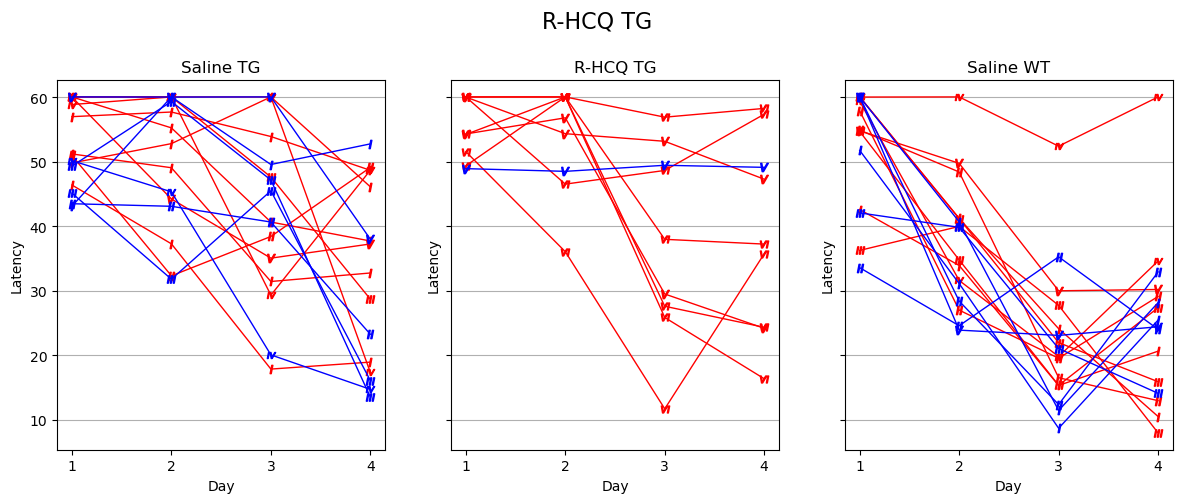

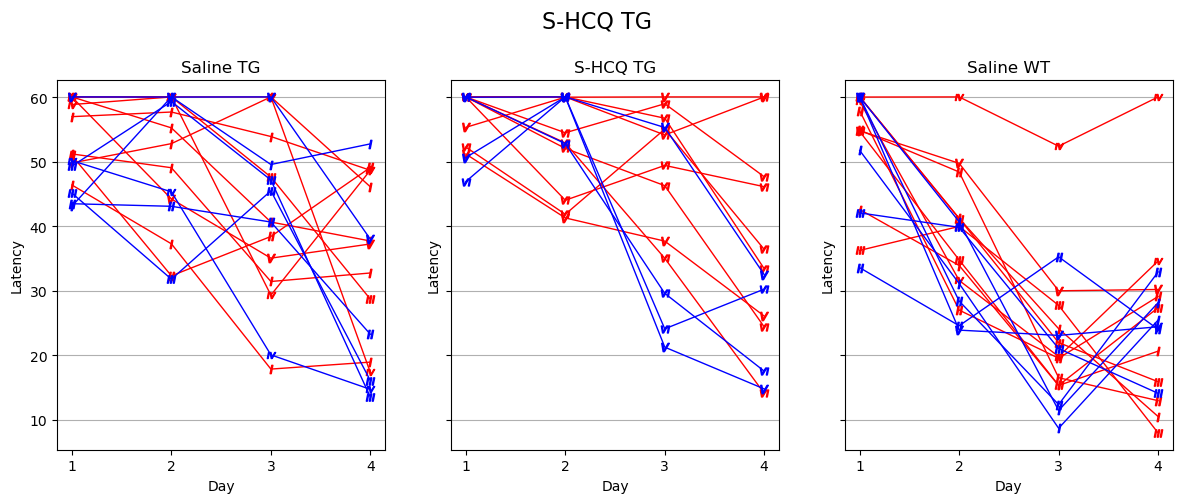

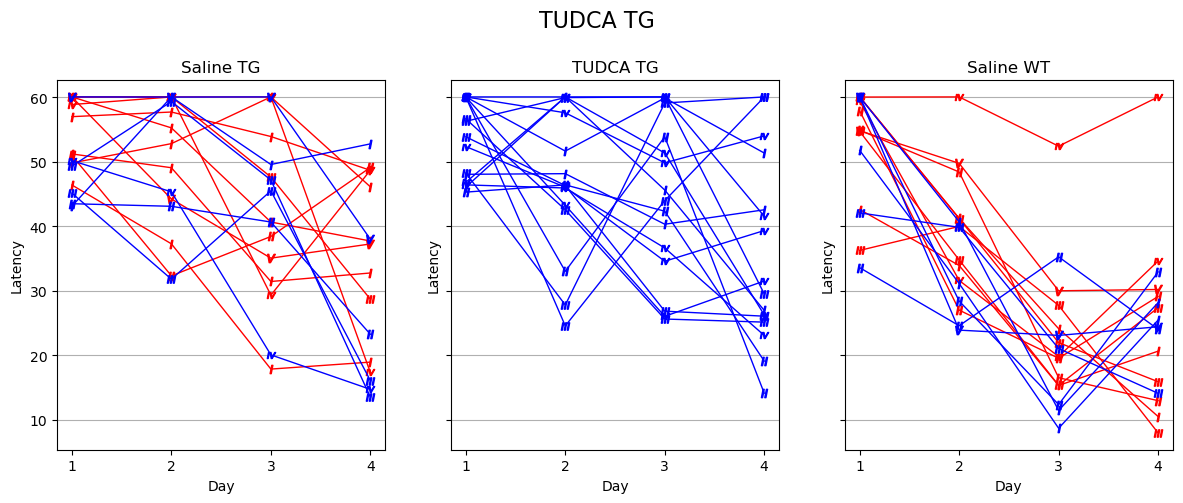

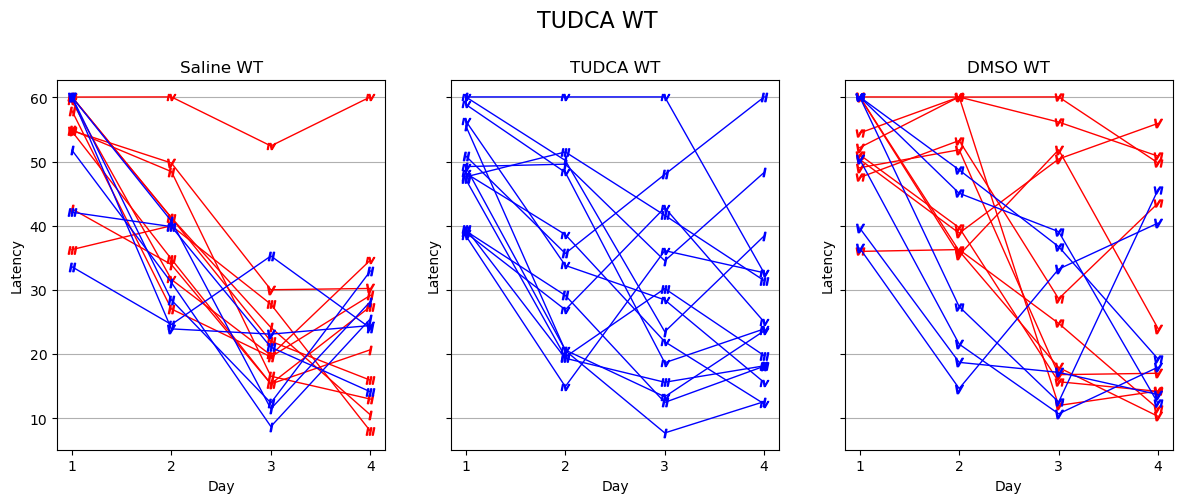

In [6]:
for k, v in plotd_CO28152.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

In [7]:
plotd_CO28154 = {
    #'Amiloride + HCQ TG': (data_CO28154, ['Saline TG', 'Amiloride + HCQ TG', 'Saline WT']), # absent from data
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT']),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Vehicle (Arundine) WT']),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG', 'Vehicle (Arundine) WT']),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG', 'Vehicle (Arundine) WT']),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT', 'Vehicle (Arundine) TG']),
    #'Amiloride + HCQ WT': (data_CO28154, ['Saline WT', 'Amiloride + HCQ WT', 'Saline TG']), # absent from data
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT', 'Saline TG']),
}


latency-TUDCA-HCQ-TG
latency-Arundine-low-dose-TG
latency-Arundine-mid-dose-TG
latency-Arundine-high-dose-TG
latency-Arundine-high-dose-WT
latency-TUDCA-HCQ-WT


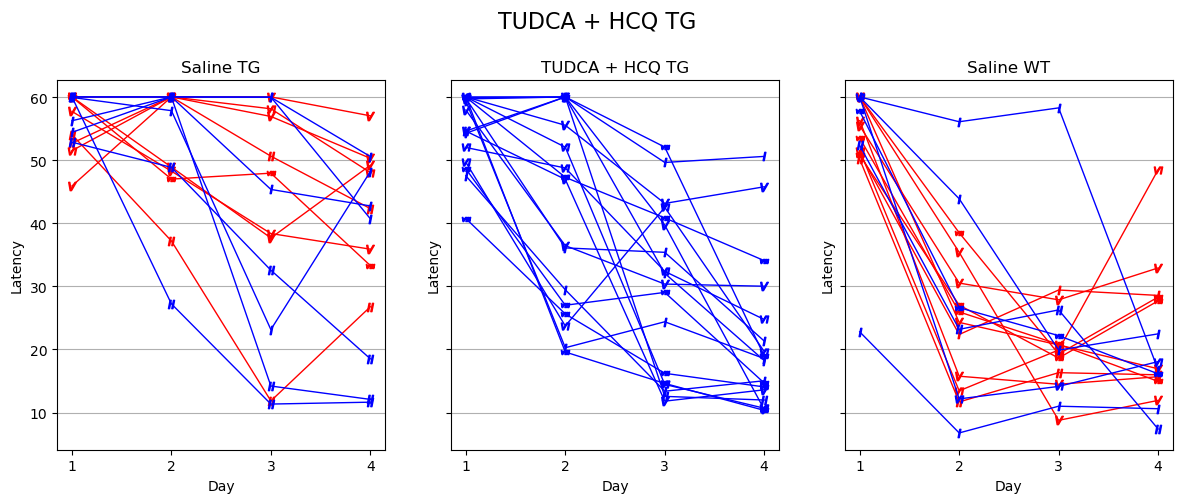

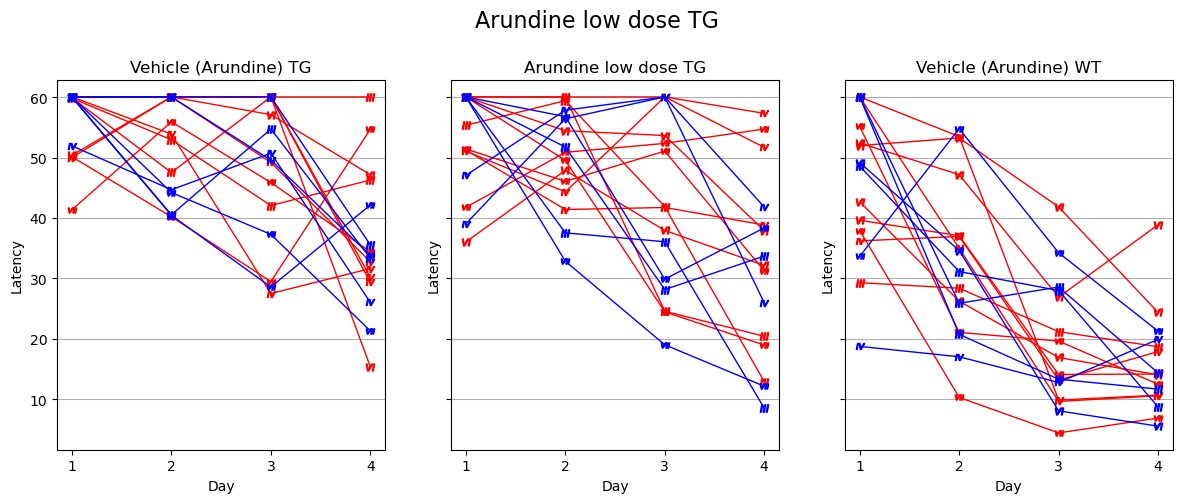

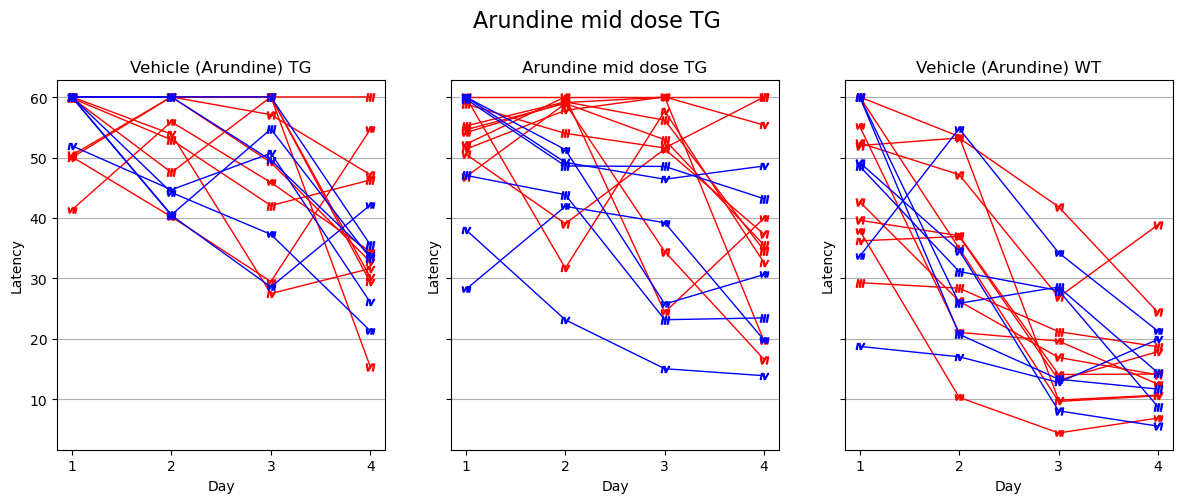

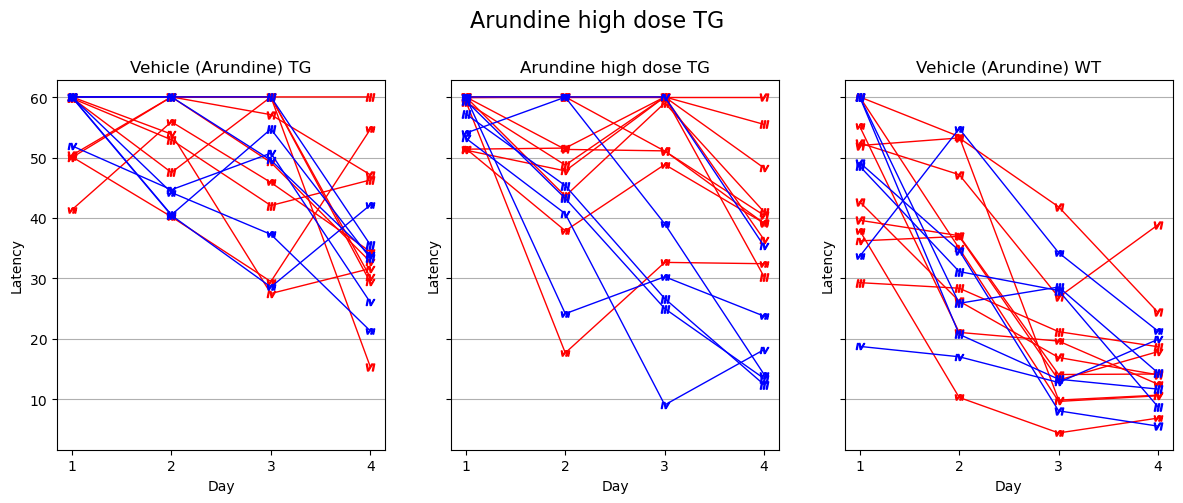

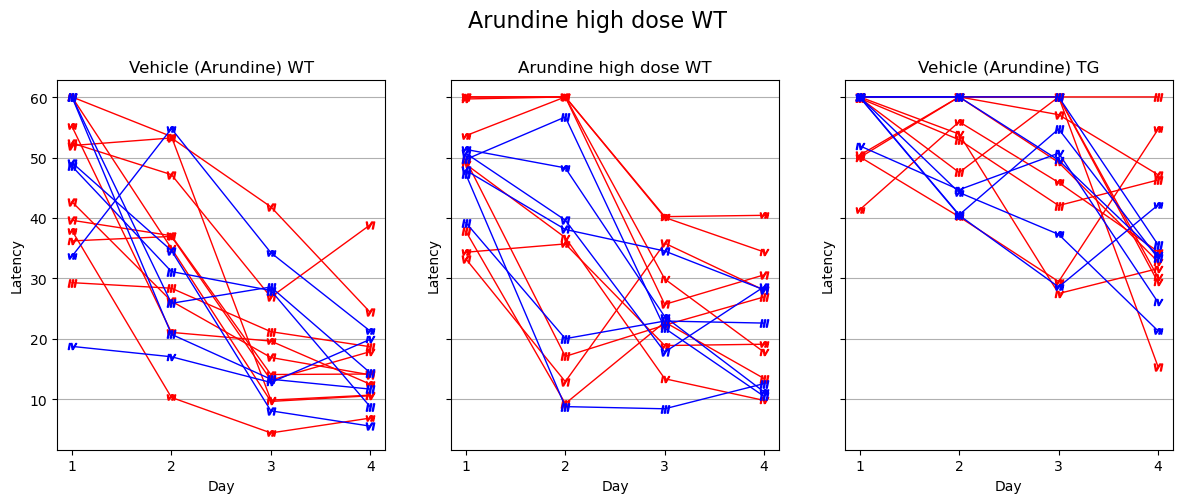

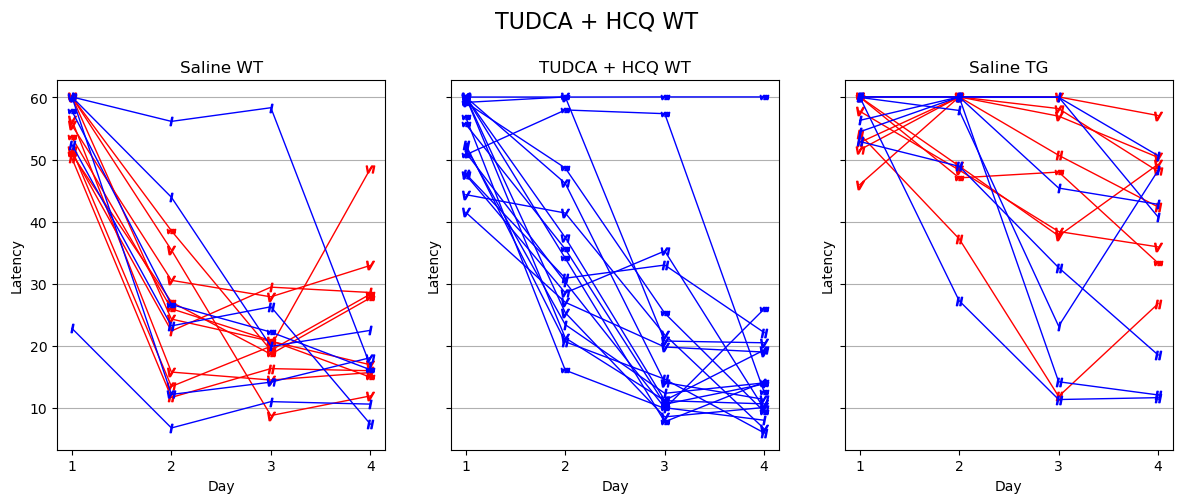

In [8]:
for k, v in plotd_CO28154.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    bname = 'latency-' + re.sub('\W+', '-', k)
    print(bname)
    attila_utils.savefig(fig, bname)

## Fit data

In [9]:
def fit_or_read_fitted(experimentsd, subdir, maindir='../../results/2024-06-04-5xfad-behavior-CO28154/'):
    if not os.path.exists(os.path.join(maindir, subdir, 'fpaths.csv')):
        idatas = mwm.fit_multiple(experimentsd)
        fpathdf = idatas_to_netcdf(idatas, subdir, maindir=maindir)
        print('idatas written to netcdf')
    else:
        idatas = mwm.idatas_from_netcdf(subdir=subdir, maindir=maindir)
        print('idatas read from netcdf')
    return(idatas)

seedl = [21947, 21949, 21976, 22021]

In [10]:
experiments3_CO26990 = {
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT'], seedl),
}
idatas3_CO26990 = fit_or_read_fitted(experiments3_CO26990, 'idatas3_CO26990', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [11]:
experiments2_CO26990 = {
    'WT': (data_CO28152, ['Saline TG', 'Saline WT'], seedl),
    'Amiloride 10 TG': (data_CO28152, ['Saline TG', 'Amiloride TG'], seedl),
}
idatas2_CO26990 = fit_or_read_fitted(experiments2_CO26990, 'idatas2_CO26990', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [12]:
experiments3_CO28152 = {
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG', 'Saline WT'], seedl),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG', 'Saline WT'], seedl),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG', 'Saline WT'], seedl),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG', 'Saline WT'], seedl),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG', 'Saline WT'], seedl),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG', 'Saline WT'], seedl),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA TG', 'Saline TG'], seedl),
}
idatas3_CO28152 = fit_or_read_fitted(experiments3_CO28152, 'idatas3_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [13]:
experiments2_CO28152 = {
    'WT': (data_CO28152, ['Saline TG', 'Saline WT'], seedl),
    'Amiloride 12 TG': (data_CO28152, ['Saline TG', 'Amiloride TG'], seedl),
    'HCQ TG': (data_CO28152, ['Saline TG', 'HCQ TG'], seedl),
    'HCQ nano TG': (data_CO28152, ['Saline TG', 'HCQ nano TG'], seedl),
    'R-HCQ TG': (data_CO28152, ['Saline TG', 'R-HCQ TG'], seedl),
    'S-HCQ TG': (data_CO28152, ['Saline TG', 'S-HCQ TG'], seedl),
    'TUDCA TG': (data_CO28152, ['Saline TG', 'TUDCA TG'], seedl),
    'TUDCA WT': (data_CO28152, ['Saline WT', 'TUDCA TG'], seedl),
}
idatas2_CO28152 = fit_or_read_fitted(experiments2_CO28152, 'idatas2_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [14]:
experiments_CO28152 = {
    'CO28152 TG': (data_CO28152,
            [
                'Saline TG',
                'Amiloride TG',
                'HCQ TG',
                'HCQ nano TG',
                'R-HCQ TG',
                'S-HCQ TG',
                'TUDCA TG',
                'Saline WT',
                ], seedl),
    'CO28152 WT': (data_CO28152, ['Saline WT', 'TUDCA WT'], seedl),
}
idatas_CO28152 = fit_or_read_fitted(experiments_CO28152, 'idatas_CO28152', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [15]:
experiments3_CO28154 = {
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT'], seedl),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG', 'Vehicle (Arundine) WT'], seedl),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT', 'Vehicle (Arundine) TG'], seedl),
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT', 'Saline TG'], seedl),
}
idatas3_CO28154 = fit_or_read_fitted(experiments3_CO28154, 'idatas3_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [16]:
experiments2_CO28154 = {
    'WT': (data_CO28154, ['Saline TG', 'Saline WT'], seedl),
    'TUDCA + HCQ TG': (data_CO28154, ['Saline TG', 'TUDCA + HCQ TG'], seedl),
    'Arundine low dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine low dose TG'], seedl),
    'Arundine mid dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine mid dose TG'], seedl),
    'Arundine high dose TG': (data_CO28154, ['Vehicle (Arundine) TG', 'Arundine high dose TG'], seedl),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT'], seedl),
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT'], seedl),
}
idatas2_CO28154 = fit_or_read_fitted(experiments2_CO28154, 'idatas2_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


In [17]:
experiments_CO28154 = {
    'TUDCA + HCQ TG': (data_CO28154,
                    [
                        'Saline TG',
                        'TUDCA + HCQ TG',
                        'Saline WT',
                    ], seedl),
    'Arundine TG': (data_CO28154,
                 [
                     'Vehicle (Arundine) TG',
                     'Arundine low dose TG',
                     'Arundine mid dose TG',
                     'Arundine high dose TG',
                     'Vehicle (Arundine) WT'
                 ], seedl),
    'TUDCA + HCQ WT': (data_CO28154,
                    [
                        'Saline WT',
                        'TUDCA + HCQ WT',
                    ], seedl),
    'Arundine WT': (data_CO28154,
                 [
                     'Vehicle (Arundine) WT',
                     'Arundine high dose WT',
                 ], seedl),
}
idatas_CO28154 = fit_or_read_fitted(experiments_CO28154, 'idatas_CO28154', maindir='../../results/2024-06-04-5xfad-behavior-CO28154/')

idatas read from netcdf


## MCMC diagnostics

### idatas3_CO28154

In [18]:
mwm.get_diagnostics(idatas_CO28152, az.ess)

In [19]:
mwm.get_diagnostics(idatas2_CO28152, az.ess)

In [20]:
mwm.get_diagnostics(idatas_CO28152, az.rhat)

In [21]:
mwm.get_diagnostics(idatas2_CO28152, az.rhat)

In [22]:
mwm.get_diagnostics(idatas_CO28152, az.mcse)

In [23]:
mwm.get_diagnostics(idatas2_CO28152, az.mcse)

## Sampled curves

['named-figure/model-latency-CO28154-TUDCA_HCQ-TG.png',
 'named-figure/model-latency-CO28154-TUDCA_HCQ-TG.pdf']

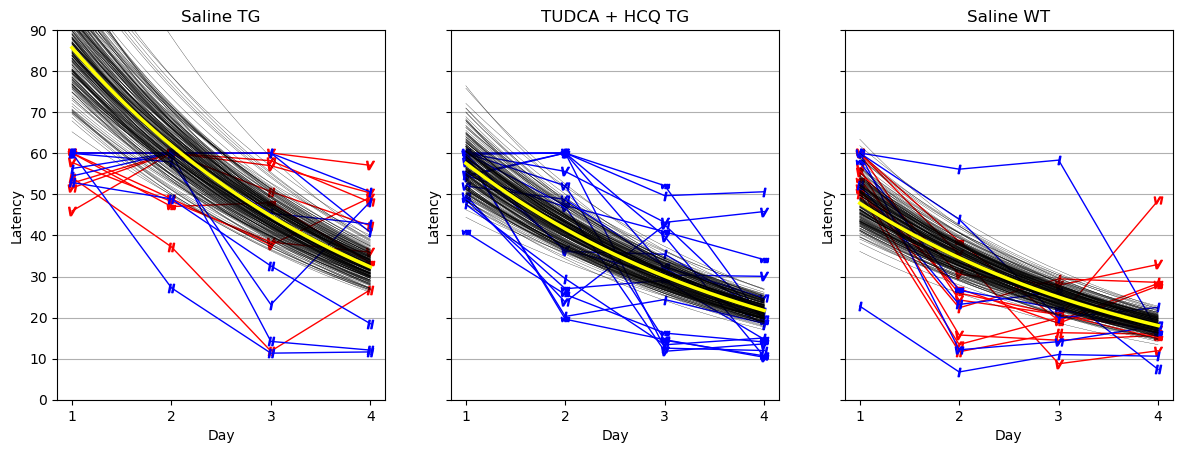

In [24]:
def model_escape_latency_plotter(idata, data, lvl=['Saline TG', 'TUDCA + HCQ TG', 'Saline WT'], ref_lvl='Saline TG', log_yscale=False, exper=''):
    treatment_lvl = lvl.copy()
    treatment_lvl.remove(ref_lvl)
    fig, ax = mwm.escape_latency_plotter(exper, data, lvl=lvl)
    summary = az.summary(idata)
    chain = 0
    xx = np.linspace(1, 4, 201)
    for level, axi in zip(lvl, ax):
        for i in np.arange(0, idata.posterior.dims['draw'], step=4):
            Intercept = idata.posterior['Intercept'][chain][i].to_numpy()
            Day = idata.posterior['Day'][chain][i].to_numpy()
            Condition = idata.posterior['C(Condition, levels=lvl)'][chain][i].to_numpy()
            Condition = [0] + list(Condition)
            prefix = '^C\(Condition, levels=lvl\)\['
            ix = [re.sub(prefix + '(.*)\]$','\\1', x) for x in summary.index if re.match(prefix + '.*$', x)]
            ix = [ref_lvl] + ix
            s_Condition = pd.Series(Condition, index=ix)
            s_Condition = s_Condition.loc[lvl]
            yy = np.exp(Intercept + s_Condition.loc[level] + Day * xx)
            axi.plot(xx, yy, linewidth=0.2, color='k')
        Intercept = summary.loc['Intercept', 'mean']
        Day = summary.loc['Day', 'mean']
        if level == ref_lvl:
            cond = 0
        else:
            cond = summary.loc['C(Condition, levels=lvl)[' + level + ']', 'mean']
        yy = np.exp(Intercept + cond + Day * xx)
        axi.plot(xx, yy, linewidth=2.5, color='yellow')
        if log_yscale:
            axi.set_yscale('log')
        axi.grid(visible=True, axis='y', which='both')
        axi.set_ylim(0, 75)
    return((fig, ax))

idata = idatas_CO28154.loc['TUDCA + HCQ TG']
lvl = ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT']
fig, ax = model_escape_latency_plotter(idata, data_CO28154, lvl=lvl, ref_lvl='Saline TG', log_yscale=False)
ax[0].set_ylim(0, 90)
attila_utils.savefig(fig, 'model-latency-CO28154-TUDCA_HCQ-TG')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_70478/2759133807.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 75)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_70478/2759133807.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 75)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_70478/2759133807.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axi.set_ylim(0, 75)


['named-figure/model-latency-CO28154-TUDCA_HCQ-TG-log.png',
 'named-figure/model-latency-CO28154-TUDCA_HCQ-TG-log.pdf']

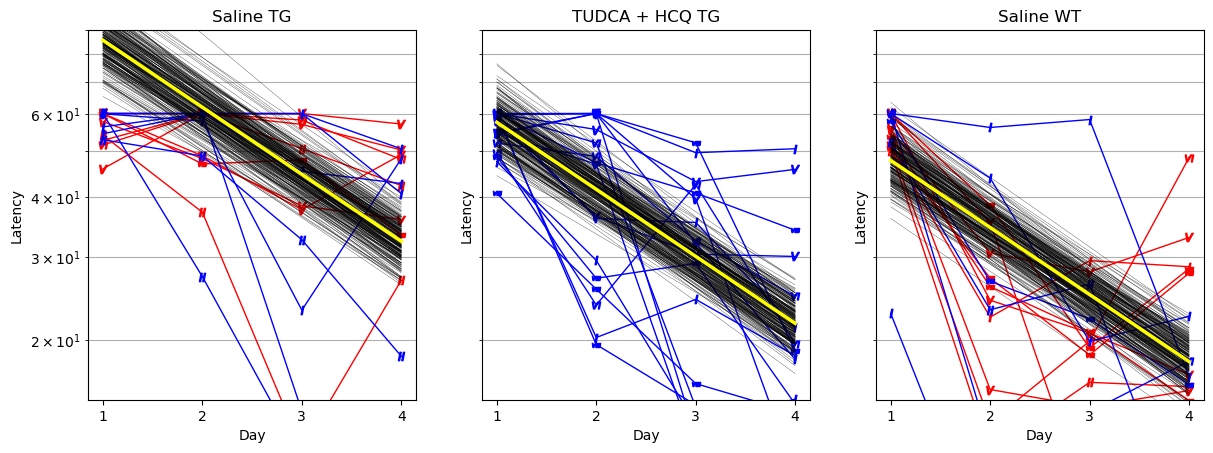

In [25]:
fig, ax = model_escape_latency_plotter(idata, data_CO28154, lvl=lvl, ref_lvl='Saline TG', log_yscale=True)
ax[0].set_ylim(15, 90)
attila_utils.savefig(fig, 'model-latency-CO28154-TUDCA_HCQ-TG-log')

In [ ]:
idata = idatas_CO28152.loc['CO28152 TG']
lvl = [
    'Saline TG',
    'TUDCA TG',
    'HCQ TG',
    'Saline WT',
]
fig, ax = model_escape_latency_plotter(idata, data_CO28152, lvl=lvl, ref_lvl='Saline TG', log_yscale=False)
attila_utils.savefig(fig, 'model-latency-CO28152-TUDCA-HCQ-TG')

In [ ]:
fig, ax = model_escape_latency_plotter(idata, data_CO28152, lvl=lvl, ref_lvl='Saline TG', log_yscale=True)
ax[0].set_ylim(25, 70)
attila_utils.savefig(fig, 'model-latency-CO28152-TUDCA-HCQ-TG-log')

## Inference

In [ ]:
def get_summary(idatas, treatment=True):
    var_names = 'C(Condition, levels=lvl)'
    if not treatment:
        var_names = idatas.iloc[0].posterior.to_dataframe().drop([var_names, '1|IRN'], axis=1).columns.to_list()
    def helper(exper):
        idata = idatas.loc[exper]
        df = az.summary(idata, var_names=var_names, hdi_prob=0.95)
        ix0 = df.index.to_list()
        ix0 = [x.replace('C(Condition, levels=lvl)[', '').replace(']', '') for x in ix0]
        ix = pd.MultiIndex.from_product([[exper], ix0])
        df = pd.DataFrame(df.to_numpy(), columns=df.columns, index=ix)
        return(df)
    l = [helper(exper) for exper in idatas.index]
    summary = pd.concat(l, axis=0)
    summary['mean %change'] = 100 * (summary['mean'].apply(np.exp) - 1)
    hdi_low, hdi_high = [summary.columns[i] for i in [2, 3]]
    summary[hdi_low + ' %change'] = 100 * (summary[hdi_low].apply(np.exp) - 1)
    summary[hdi_high + ' %change'] = 100 * (summary[hdi_high].apply(np.exp) - 1)
    return(summary)


def get_BF(exper='TUDCA + HCQ TG', fullfx_treat='Saline WT', idatas=idatas_CO28154, append_summary=False):
    pseudocount = 0.5
    idata = idatas.loc[exper]
    summary = get_summary(idatas, treatment=True).xs(exper, level=0, axis=0)
    s = summary.loc[fullfx_treat]
    num = 3
    columnd = {0: 'full rescue', 1: 'partial rescue', 2: 'slight improvement'}
    tt = np.linspace(s.loc['mean'], 0, num=num)
    t0 = tt[-1]
    def helper(i):
        t1 = tt[i]
        H1_bool = idata.posterior['C(Condition, levels=lvl)'] < t1
        H1_count = sum(sum(H1_bool)) + pseudocount
        H0_bool = idata.posterior['C(Condition, levels=lvl)'] > t0
        H0_count = sum(sum(H0_bool)) + pseudocount
        BF = H1_count / H0_count
        val = 2 * np.log(BF)
        val = val.to_pandas().to_frame('2 log BF')
        val['t1'] = t1
        val['t0'] = t0
        ix = pd.MultiIndex.from_product([[columnd[i]], val.columns])
        val = pd.DataFrame(val.to_numpy(), columns=ix, index=val.index)
        return(val)
    l = [helper(i) for i in range(num)]
    df = pd.concat(l, axis=1)
    df = df.rename(columnd, axis=1)
    if append_summary:
        ix = pd.MultiIndex.from_product([['log change of escape latency'], summary.columns])
        summary = pd.DataFrame(summary.to_numpy(), columns=ix, index=summary.index)
        df = pd.concat([df, summary], axis=1)
        l = [[exper], df.index]
        ix = pd.MultiIndex.from_product(l)
        df = pd.DataFrame(df.to_numpy(), columns=df.columns, index=ix)
    return(df)


def plot_ci(idatas, exper, ref_lvl='Saline TG'):
    df = get_summary(idatas, treatment=True)
    #df = df.xs(exper, level=0, axis=0)
    print(df.shape[0] * 0.4)
    fig, ax = plt.subplots(figsize=(4.8, df.xs(exper, level=0, axis=0).shape[0] * 0.4))
    ax, twin_ax = plot_ci_ax(ax, df, exper, ref_lvl=ref_lvl)
    return(fig, ax)


def set_axlim(ax, twin_ax, x_min, x_max):
    x_range = x_max - x_min
    left_lim = x_min - 0.1 * x_range
    right_lim = x_max + 0.1 * x_range
    ax.set_xlim(left_lim, right_lim)
    #fractions = np.arange(0.2, 3, step=0.2)
    fractions = np.array([10, 20, 30, 40, 60, 80, 100, 125, 150, 200, 250]) / 100
    #fractions = np.array([-90, -80, -70, -60, -50, -40, -20, 0, 25, 50, 100, 150]) / 100
    # percentage-scaled fold-change
    twin_ax.set_xticks(np.log(fractions))
    xticklabels = [str(x) + '%' for x in np.array(np.round(100 * (fractions - 1)), dtype=int)]
    twin_ax.set_xticklabels(xticklabels, rotation=0)
    twin_ax.set_xlim(left_lim, right_lim)
    return((ax, twin_ax))


def plot_ci_ax(ax, df, exper, ref_lvl='Saline TG', do_set_axlim=True):
    x_min = df.iloc[:, 2].min()
    x_max = df.iloc[:, 3].max()
    #x_range = x_max - x_min
    df = df.xs(exper, level=0, axis=0)
    df['treatment'] = df.index
    xerr = df.apply(lambda r: pd.Series({'xerr_left': r.loc['mean'] - r.iloc[2], 'xerr_right': r.iloc[3] - r.loc['mean']}), axis=1)
    xerr = xerr.transpose()
    ax.errorbar(x='mean', y=list(range(df.shape[0])), xerr=xerr, data=df, fmt='o', linewidth=1, capsize=5)
    ax.set_yticks(list(range(df.shape[0])))
    ax.set_yticklabels(df.treatment)
    ax.set_ylim(-0.5, df.shape[0] - 0.5)
    ax.axvline(0, color='k')
    ax.grid(linestyle='dotted', axis='y')
    ax.set_xlabel(r'$\beta_1$: log-scaled $\Delta$ escape latency')
    twin_ax = ax.twiny()
    if do_set_axlim:
        ax, twin_ax = set_axlim(ax, twin_ax, x_min, x_max)
    twin_ax.set_xlabel(r'$\Delta$ escape latency')
    ax.set_title('Change w.r.t ' + ref_lvl)
    return((ax, twin_ax))

exper_list = ['Amiloride 10 TG', 'CO28152 TG', 'TUDCA + HCQ TG', 'Arundine TG']
fullfx_lvls = ['Saline WT', 'Saline WT', 'Saline WT', 'Vehicle (Arundine) WT']
ref_lvls = ['Saline TG', 'Saline TG', 'Saline TG', 'Vehicle (Arundine) TG']



### Bayes factors

In [ ]:
fpath = '../../results/2024-06-04-5xfad-behavior-CO28154/BF-all.csv'
if not os.path.exists(fpath):
    idatasl = [idatas3_CO26990, idatas_CO28152, idatas_CO28154, idatas_CO28154]
    Z = zip(exper_list, fullfx_lvls, idatasl)
    l = [get_BF(exper=e, fullfx_treat=f, idatas=i, append_summary=True) for e, f, i in Z]
    BF_all = pd.concat(l, axis=0)
    BF_all.to_csv(fpath)
else:
    BF_all = pd.read_csv(fpath, index_col=[0, 1], header=[0, 1])
BF_all

In [ ]:
pd.wide_to_long?

In [ ]:
def plot_bf_ax(ax, df, exper):
    BF = df.xs(exper, level=0, axis=0).xs('2 log BF', level=1, axis=1).copy()
    BF = BF.stack().to_frame('2 log BF')
    BF['treatment'] = BF.index.get_level_values(0)
    BF['H1'] = BF.index.get_level_values(1)
    palette = ['black', 'red', 'pink']
    sns.barplot(data=BF, x='2 log BF', y='treatment', hue='H1', ax=ax, palette=palette)
    return(ax)


def plot_ci_bf(BF_all, experl=exper_list, fullfx_lvls=fullfx_lvls, ref_lvls=ref_lvls):
    height_ratios = [BF_all.xs(e, level=0, axis=0).shape[0] for e in experl]
    width_ratios = [3, 2]
    gridspec_kw = {'left': 0.05, 'right': 0.48, 'hspace': 0.75}
    fig, ax = plt.subplots(len(experl), 2, height_ratios=height_ratios, width_ratios=width_ratios, figsize=(12.8, 6.4), gridspec_kw=gridspec_kw)
    #gs = GridSpec(len(experl), 2, height_ratios=height_ratios, width_ratios=width_ratios, left=0.05, right=0.48, hspace=0.75)
    #fig = plt.figure(figsize=(12.8, 6.4))
    Z = zip(exper_list, fullfx_lvls, ref_lvls)
    for i, t in enumerate(Z):
        exper, fullfx_lvl, ref_lvl = t
        print(exper)
        df = BF_all.xs(exper, level=0, axis=0, drop_level=False)
        df_latency = df.xs('log change of escape latency', level=0, axis=1)
        ax_left = ax[i, 0]
        #ax = fig.add_subplot(gs[i, 0])
        ax_left, ax_left_twin = plot_ci_ax(ax_left, df_latency, exper, ref_lvl=ref_lvl, do_set_axlim=False)
        x_min = -0.8
        x_max = 0.5
        ax_left, ax_left_twin = set_axlim(ax_left, ax_left_twin, x_min, x_max)
        ax_left.set_title('')
        if i > 0:
            ax_left_twin.set_xlabel('')
        if i < len(exper_list) - 1:
            ax_left.set_xlabel('')
        df_t1 = BF_all.xs('t1', level=1, axis=1)
        t1_full = df_t1['full rescue'].iloc[0]
        ax_right = ax[i, 1]
        #ax2 = fig.add_subplot(gs[i, 1])
        ax_right = plot_bf_ax(ax_right, BF_all, exper)
        ax_right.legend_.remove()
        x2_min = -10
        x2_max = 20
        ax_right.set_xlim(x2_min, x2_max)
        ax_right.set_ylim(ax_right.get_ylim()[1], ax_right.get_ylim()[0])
        ax_right.set_yticklabels([])
        ax_right.set_ylabel('')
        ax_right.grid(linestyle='dotted', axis='y')
    return(fig)

fig = plot_ci_bf(BF_all)

In [ ]:
plot_ci_bf(BF_all, experl=exper_list[1:3], fullfx_lvls=fullfx_lvls[1:3], ref_lvls=ref_lvls[1:3])

### Study CO26990

In [ ]:
fig, ax = plot_ci(idatas3_CO26990, 'Amiloride 10 TG', 'Saline TG')
attila_utils.savefig(fig, 'learning-rate-effect-CO26990-Amiloride-10-TG')

In [ ]:
get_summary(idatas3_CO26990, False)

### Study CO28152

In [ ]:
fig, ax = plot_ci(idatas_CO28152, 'CO28152 TG', 'Saline TG')
attila_utils.savefig(fig, 'learning-rate-effect-CO28152-all-TG')

In [ ]:
fig, ax = plot_ci(idatas_CO28152, 'CO28152 WT', 'Saline WT')
attila_utils.savefig(fig, 'learning-rate-effect-CO28152-all-WT')

In [ ]:
get_summary(idatas_CO28152, False)

### Study CO28154

In [ ]:
fig, ax = plot_ci(idatas_CO28154, 'TUDCA + HCQ TG', 'Saline TG')
attila_utils.savefig(fig, 'learning-rate-effect-CO28154-HCQ_TUDCA-TG')

In [ ]:
fig, ax = plot_ci(idatas_CO28154, 'Arundine TG', 'Vehicle (Arundine) TG')
attila_utils.savefig(fig, 'learning-rate-effect-CO28154-Arundine-TG')

In [ ]:
fig, ax = plot_ci(idatas_CO28154, 'TUDCA + HCQ WT', 'Saline WT')
attila_utils.savefig(fig, 'learning-rate-effect-CO28154-HCQ_TUDCA-WT')

In [ ]:
fig, ax = plot_ci(idatas_CO28154, 'Arundine WT', 'Vehicle (Arundine) WT')
attila_utils.savefig(fig, 'learning-rate-effect-CO28154-Arundine-WT')

In [ ]:
get_summary(idatas_CO28154, treatment=False)

In [ ]:
%connect_info